In [1]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  


In [2]:
data = pd.read_csv("student_scores.csv")              #reading csv file data set

In [3]:
data                                           #displaying data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()                                              #describing the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


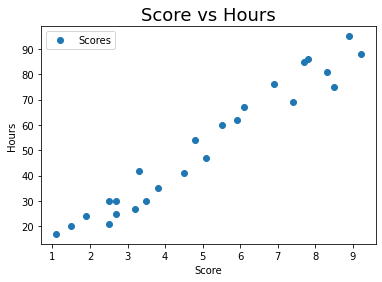

In [5]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Score vs Hours', fontsize= 18)      # Plotting the distribution of scores
plt.xlabel('Score',fontsize = 10)  
plt.ylabel('Hours', fontsize = 10)  
plt.show()

**The graph shows Positive Linear Relation between the number of hours studied and percentage score**

**Preparing the data for analysis**

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,             #splitting the data into training and testing sets
                            test_size=0.2, random_state=0)            #using scikit-learn's built in function 

**Training the Algorithm**

In [8]:
from sklearn.linear_model import LinearRegression                     #Training the data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


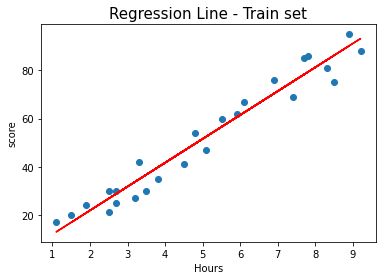

In [9]:
line = regressor.coef_*X+regressor.intercept_                          # Plotting the regression line
plt.scatter(X, y)  
plt.plot(X, line, color = "red");
plt.xlabel("Hours", fontsize = 10)
plt.ylabel("score", fontsize = 10)
plt.title("Regression Line - Train set", fontsize = 15,)
plt.show()

**Making the predictions**

In [10]:
print(X_test)                                                      # Testing data - In Hours
y_pred = regressor.predict(X_test)                                 # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
#Parameters used for the model 
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})          #Comparison between predicted and test data
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


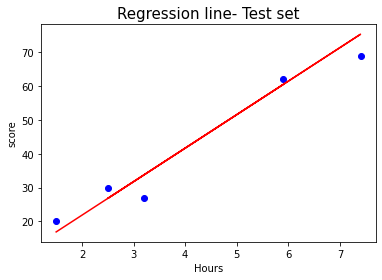

In [13]:
plt.plot(X_test, y_pred, color = "red") 
plt.scatter(X_test, y_test, color = "blue")                          #Using scatter plot fir test data set
plt.xlabel("Hours", fontsize = 10)
plt.ylabel("score", fontsize = 10)
plt.title("Regression line- Test set", fontsize =15)
plt.show()

**Accuracy of the Model**

In [14]:
from sklearn import metrics                                             #Calculating Accuracy of the model
metrics.r2_score(y_test, y_pred)

0.9454906892105356

**94% Accuracy**

**Prediction of score**

In [15]:
predict_score = regressor.predict([[9.25]])
print("The percentage score for studied hours 9.25 -- ", predict_score)

The percentage score for studied hours 9.25 --  [93.69173249]


In [16]:
print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))

Mean Square Error 21.5987693072174


In [17]:
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Model R^2 Square value 0.9454906892105356
